# Global Power Plant Database

#### Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database The database includes the following indicators:

- country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long (text): longer form of the country designation
- name (text): name or title of the power plant, generally in Romanized form
- gppd_idnr (text): 10 or 12 character identifier for the power plant
- capacity_mw (number): electrical generating capacity in megawatts
- latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel (text): energy source used in primary electricity generation or export
- other_fuel1 (text): energy source used in electricity generation or export
- other_fuel2 (text): energy source used in electricity generation or export
- other_fuel3 (text): energy source used in electricity generation or export
- commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
- owner (text): majority shareholder of the power plant, generally in Romanized form
- source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url (text): web document corresponding to the source field
- geolocation_source (text): attribution for geolocation information
- wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data (number): year the capacity information was reported
- generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
- generation_data_source (text): attribution for the reported generation information
- estimated_generation_gwh (number): estimated electricity generation in gigawatt-hours

#### Fuel Type Aggregation
define the "Fuel Type" attribute of our database based on common fuel categories.

# Prediction : 
Make two prediction 1) Primary Fuel 2) capacity_mw

In [1]:
#importing necessary library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#reading csv and storing it in df
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### deleting columns url , owner, source and geolocation_source as it has nothing to do with power generation

In [3]:
df.drop(['url','owner','source', 'geolocation_source'],inplace=True,axis=1)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### checking nulls

In [4]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [5]:
#filtering columns where more than 80% nulls are present
pos=np.where(df.isnull().sum()>680)
df.columns[pos]

Index(['other_fuel1', 'other_fuel2', 'other_fuel3', 'wepp_id',
       'generation_gwh_2013', 'generation_gwh_2019',
       'estimated_generation_gwh'],
      dtype='object')

- Columns that needs to be deleted as they have more than 75% missing data
    - other_fuel1 has 709 null datas
    - other_fuel2 has 906 null datas
    - other_fuel3 has 907 null datas
    - wepp_id has 907 null datas
    - generation_gwh_2013 has 907 null datas
    - generation_gwh_2019 has 907 null datas
    - estimated_generation_gwh has 907 null datas
 
 
- Columns that need imputation
    - latitude and longitude 
    - commissioning_year
    - year_of_capacity_data
    - generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, 
    - generation_data_source

#### deleting columns`with large no. of null datas

In [6]:
df.drop(['other_fuel1','other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013',
       'generation_gwh_2019', 'estimated_generation_gwh'],inplace=True,axis=1)

#### Checking for unique values in each columns

In [7]:
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
commissioning_year         73
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

- country and country_long can be deleted as it has only one unique data and its considering data in one country
- year_of_capacity_data can be deleted as it has only one unique data that is 2019
- generation_data_source can be deleted as it has only one unique data that is Central Electricity Authority
- gppd_idnr can be deleted as its for identiifcation purpose
- owner can be deleted as it has nothing to do with power generation

In [8]:
pos=np.where(df.nunique()<2)
df.columns[pos]

Index(['country', 'country_long', 'year_of_capacity_data',
       'generation_data_source'],
      dtype='object')

In [9]:
pos=np.where(df.nunique()==907)
df.columns[pos]

Index(['name', 'gppd_idnr'], dtype='object')

#### deleting columns`with one unique data and all datas unique

In [10]:
df.drop(['country', 'country_long', 'year_of_capacity_data','generation_data_source','name', 'gppd_idnr'],inplace=True,axis=1)

#### checking datatype

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   527 non-null    float64
 5   generation_gwh_2014  398 non-null    float64
 6   generation_gwh_2015  422 non-null    float64
 7   generation_gwh_2016  434 non-null    float64
 8   generation_gwh_2017  440 non-null    float64
 9   generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(1)
memory usage: 71.0+ KB


combination of object and numerical datatypes

#### seperating numerical and categorical data type

In [12]:
numericalCol=df.select_dtypes(include=np.number).columns
print("The numerical columns are:",numericalCol)
print('\n')
objectColumns=df.select_dtypes(include=np.object).columns
print("The categorical columns are:",objectColumns)

The numerical columns are: Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')


The categorical columns are: Index(['primary_fuel'], dtype='object')


#### diving numerical columns into two categories discrete and continuous

In [13]:
discretecols=[]
continuecols=[]

for column in numericalCol:
     if df[column].nunique()>10:
        continuecols.append(column)
     
     else:
        discretecols.append(column)
        
print("The discrete columns are:",discretecols)
print('\n')
print("The continuous columns are:",continuecols) 

The discrete columns are: []


The continuous columns are: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


there is no discrete columns

#### check for duplicates

In [14]:
df.duplicated().sum()

1

In [15]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)


In [16]:
df.drop('index',axis=1,inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
901,1600.0,16.2949,77.3568,Coal,2016.0,NaN,0.994875,233.596650,865.400000,686.500000
902,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN
903,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN
904,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN


#### Imputation

- imputing latitude and longitude 

In [17]:
# grouping primary_fuel and using the agg function to get value of latitude mean and longitude mean  to get the ideal place where it should be installed
# there will be an error because its not physically possible for two plants to be in the same location, getting an ideal location 
# the coordinates play vital role for those plants which rely on renewable energy as energy generated is highly dependent on location (wind ,solar in this case) and also for hydro power plants

lat_long_mean=df.pivot_table(values=['latitude','longitude'], index='primary_fuel')
lat_long_mean

,latitude,longitude
primary_fuel,,
Biomass,17.460458,75.679052
Coal,21.657714,79.431460
Gas,20.050144,78.408238
Hydro,22.258483,78.846256
Nuclear,18.081478,76.124056
Oil,17.311847,74.833806
Solar,24.095380,74.352328
Wind,17.857224,74.181553


In [18]:
#storing index values where nulls are present
pos = df['latitude'].isnull()
a=df['longitude'].isnull()

In [19]:
# impute values
df.loc[pos, 'latitude'] = df.loc[pos, 'primary_fuel'].apply(lambda x: lat_long_mean.loc[x])
df.loc[pos, 'longitude'] = df.loc[a, 'primary_fuel'].apply(lambda x: lat_long_mean.loc[x])

In [20]:
# check
df['latitude'].isnull().sum()


0

In [21]:
#check
df['longitude'].isnull().sum()


0

- imputing commissioning_year

In [22]:
year=df.groupby(['primary_fuel'])[['commissioning_year']].mean()
year

,commissioning_year
primary_fuel,
Biomass,NaN
Coal,2006.021164
Gas,2002.830508
Hydro,1988.709163
Nuclear,1994.250000
Oil,1994.583333
Solar,2013.375000
Wind,NaN


- Biomass and wind power plants has no data for  commissioning year

In [23]:
# as we dont know when Biomass and Wind power plant were established assuming that all plants were commisioned in 2012
# the first large scale Biomass was commsioned on 2012, source interent


pos=np.where(df['primary_fuel']=='Biomass')
for i in pos:
    df.loc[i,'commissioning_year']=2012
    
# wind plant was commisioned from late 1986,but i am not sure if these plants were used for commerical power generation in 1986
# assume that all wind plant commisioned from 2012 

pos=np.where(df['primary_fuel']=='Wind')
for i in pos:
    df.loc[i,'commissioning_year']=2012

In [24]:
#checking the no.of null values present in commissioning_year
df['commissioning_year'].isnull().sum()

207

In [25]:
# grouping by primary fuel and taking the avg of all commissioning year for that fuel source

year=df.groupby(['primary_fuel'])[['commissioning_year']].mean()
year

,commissioning_year
primary_fuel,
Biomass,2012.000000
Coal,2006.021164
Gas,2002.830508
Hydro,1988.709163
Nuclear,1994.250000
Oil,1994.583333
Solar,2013.375000
Wind,2012.000000


In [26]:
for index in year.index:
    pos=df.loc[df["primary_fuel"]==index,["commissioning_year"]].isnull()
    for index_2 in pos.index:
        if pos.loc[index_2][0]==True:
            df.loc[index_2,["commissioning_year"]]=year.loc[index]

In [27]:
# check
df['commissioning_year'].isnull().sum()

0

- imputation for generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018,

In [28]:
# checking nulls for each year

for i in range(2015,2020,1):
    print('nulls in generation_gwh_{}:'.format(i-1) ,df["generation_gwh_{}".format(i-1)].isna().sum())

nulls in generation_gwh_2014: 508
nulls in generation_gwh_2015: 484
nulls in generation_gwh_2016: 472
nulls in generation_gwh_2017: 466
nulls in generation_gwh_2018: 458


In [29]:
# assigning the value of power generation as 0, whern the commisioning year is greater than or equal to generation year 
# ex if commissioning year is 2015 generation  year is 2014, the generation is zero as the plant is not ready for generating power for commercial use
# assumption2 when commissioning year value is 2015, it implies that power plant was available for generating power only at the begining of the next year, here its 2016 


pos=np.where(df['commissioning_year']>=2015)
for i in pos:
     df.loc[i,'generation_gwh_2014']=0
        
pos=np.where(df['commissioning_year']>=2016)
for i in pos:
     df.loc[i,'generation_gwh_2015']=0
        
pos=np.where(df['commissioning_year']>=2017)
for i in pos:
     df.loc[i,'generation_gwh_2016']=0
        
pos=np.where(df['commissioning_year']>=2018)
for i in pos:
     df.loc[i,'generation_gwh_2017']=0 
        
pos=np.where(df['commissioning_year']>=2019)
for i in pos:
     df.loc[i,'generation_gwh_2018']=0                

In [30]:
#checking nulls presents after imputing

for i in range(2015,2020,1):
    print('nulls in generation_gwh_{}:'.format(i-1) ,df["generation_gwh_{}".format(i-1)].isna().sum())

nulls in generation_gwh_2014: 458
nulls in generation_gwh_2015: 457
nulls in generation_gwh_2016: 457
nulls in generation_gwh_2017: 464
nulls in generation_gwh_2018: 458


In [31]:
# printing all unique values for primary fuel

df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [32]:
# the first loop is used to consider the year of power generation
# power generation is the energy stored by power plant in a year 
# pos is used to store the nulls present in year which is currently considered
# iterating based on the values in pos 
# generation value is obtained by multiplying capacity of plant * 24(hours) * 365 (days) * efficency  and finally dividing it by 1000 to convert it to Gwh (required unit)
# the efficeny considered for solar is 50%, wind is 40% and for biomass is 35% and for the rest of the sources is 80%
 

for j in range(2014,2019):
    pos=0
    pos=np.where(df['generation_gwh_{}'.format(j)].isna()==True)
    for k in pos:
        if [df['primary_fuel'].iloc[k]]=='Solar':
            df['generation_gwh_{}'.format(j)].iloc[k] =((df['capacity_mw'].iloc[k]*24*365*0.5)/1000)
        elif [df['primary_fuel'].iloc[k]]=='Wind':
            df['generation_gwh_{}'.format(j)].iloc[k]=((df['capacity_mw'].iloc[k]*24*365*0.4)/1000)
        elif [df['primary_fuel'].iloc[k]]=='Biomass':
            df['generation_gwh_{}'.format(j)].iloc[k]=((df['capacity_mw'].iloc[k]*24*365*0.35)/1000)    
        else:
            df['generation_gwh_{}'.format(j)].iloc[k]=((df['capacity_mw'].iloc[k]*24*365*0.8)/1000)

In [33]:
# check

for i in range(2015,2020,1):
    print('nulls in generation_gwh_{}:'.format(i-1) ,df["generation_gwh_{}".format(i-1)].isna().sum())

nulls in generation_gwh_2014: 0
nulls in generation_gwh_2015: 0
nulls in generation_gwh_2016: 0
nulls in generation_gwh_2017: 0
nulls in generation_gwh_2018: 0


- final check for nulls

In [34]:

df.isna().sum().sum()

0

- capacity_mw

In [35]:
# no power plant can have zero capacity storing the values of indexes where such condition occurs 

pos=np.where(df['capacity_mw']==0)
df.loc[pos]

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
828,0.0,12.8491,77.6752,Solar,2013.375,0.0,0.0,0.0,0.0,0.0


 only one such cases has occured 


In [36]:
capacity_mean=df.pivot_table(values=['capacity_mw'], index='primary_fuel')
capacity_mean

,capacity_mw
primary_fuel,
Biomass,20.065200
Coal,797.826434
Gas,364.818928
Hydro,185.026972
Nuclear,975.555556
Oil,88.942000
Solar,21.712598
Wind,33.519262


In [37]:
# imputing the avg value

df.loc[828,'capacity_mw']=21.712598

In [38]:
#check
df.loc[828]

capacity_mw            21.712598
latitude                 12.8491
longitude                77.6752
primary_fuel               Solar
commissioning_year      2013.375
generation_gwh_2014          0.0
generation_gwh_2015          0.0
generation_gwh_2016          0.0
generation_gwh_2017          0.0
generation_gwh_2018          0.0
Name: 828, dtype: object

#### checking how the data is defined statistically for numerical continuous datas and visualising

In [39]:
df[continuecols].describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,906.0,326.582957,590.312125,1.0000,16.962500,59.600000,386.625000,4760.000
latitude,906.0,21.168562,6.105802,8.1689,17.065350,21.778300,25.178075,34.649
longitude,906.0,77.431055,4.845145,68.6447,74.247525,76.729350,79.326675,95.408
commissioning_year,906.0,2002.778485,14.861056,1927.0000,1997.000000,2010.000000,2013.000000,2018.000
generation_gwh_2014,906.0,1183.234008,2932.911942,0.0000,57.561998,178.704000,700.800000,28127.000
generation_gwh_2015,906.0,1254.770839,3110.361979,0.0000,68.139488,182.604000,738.487538,30539.000
generation_gwh_2016,906.0,1309.564381,3134.863586,0.0000,70.080000,196.224000,837.655125,30015.000
generation_gwh_2017,906.0,1373.576986,3187.333180,0.0000,73.584000,206.153650,919.216750,35116.000
generation_gwh_2018,906.0,1416.043900,3297.231619,0.0000,73.584000,213.560875,971.382512,35136.000


- capacity_mw
    - mean to std is 0.55
    - min is 1 for solar power plant, max is 4760 prdoduced by coal power plant
    - the avg capacity of power plant is 590.3
    - the differnce between each quantile is not uniform
    

- commissioning_year
    - the oldest power plant was commisioned in 1927 (hydro) and the latest being commisioned at 2018 (coal and hydro)
    
    
-  generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018
    - it has min as zero, this is because the plants were commisioned not in that year 
    - the generation increased as the years increased, this could be due to increase in no. of power plants or due to hgh demand for energy causing the plants to be run at peak capacity
    
    

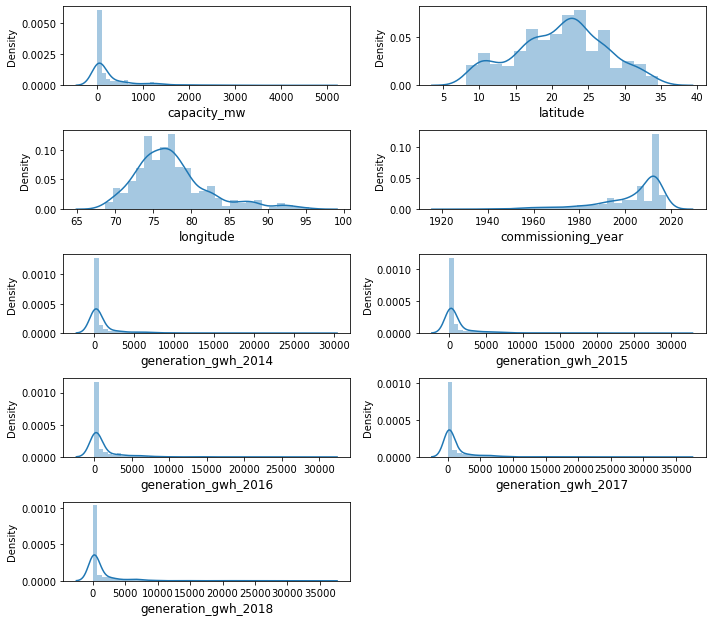

In [40]:
# plotting distribution graph 
j=0
plt.figure(figsize=(10,10))
for column in df[continuecols]:
    plt.subplot(6,2,j+1)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- capacity_mw
    - data is not uniformly distributed
    - presence of outliers
    
    
- latitude
    - values range from 7.5 to 35
    - negatively skewed
    
    
- longitude
    - value in the range 70-88
    - positively skewed
    - presence of outliers
 

- commissioning year
    - negatvely skewed
    - presence of outliers
    - large no.of power plants were commissioned in 2000-2020
    
    
- generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018
    - presence of outliers
    - there is high concentration at value zero this is because many power plants taken into consderation were not commissioned that year also oil power plant stopped generating from 2000

#### checking how the data is defined statistically for categorical datas`and visualising

In [41]:
df[objectColumns].describe(include=['O']).T

,count,unique,top,freq
primary_fuel,906,8,Coal,258


- there are 8 types of power plants installed 
- the most common type of power plant is coal powered power plant
- 28.9% of power plants are coal powered

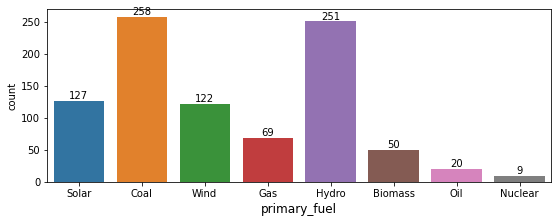

In [42]:
# plotting countplot graph 
j=0
plt.figure(figsize=(15,30))
for column in df[objectColumns]:
    plt.subplot(10,2,j+1)
    ax =sns.countplot(df[column])
    ax.bar_label(ax.containers[0]);
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- Coal is the the most widely used power plant, followed by hydro power plant
- Oil and nuclear has the least no. of power plants installed
- Solar, Wind and Biomass power plants are renewable power plants account for 32.9% of total power plant installed

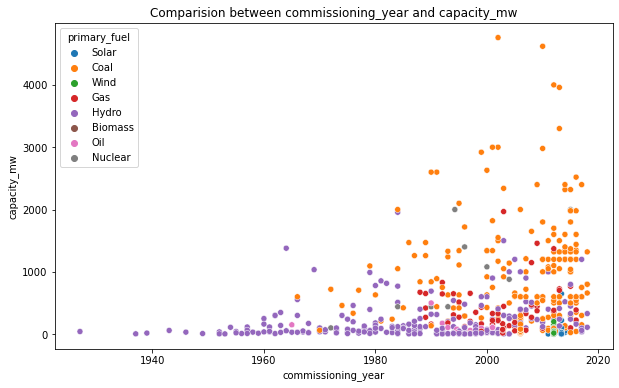

In [43]:
plt.figure(figsize=[10,6])
plt.title('Comparision between commissioning_year and capacity_mw')
sns.scatterplot(df['commissioning_year'],df["capacity_mw"], hue=df['primary_fuel']);

- as the years increased, capacity of the plants also increased, the types of power plants installed increased
- from 1940-1980 hydro power plants were only used
- 1981-2000 hydro and coal power plants were used
- 2000-2020 other types of power plants were installed, but their capacity were low compared to coal and hydro 

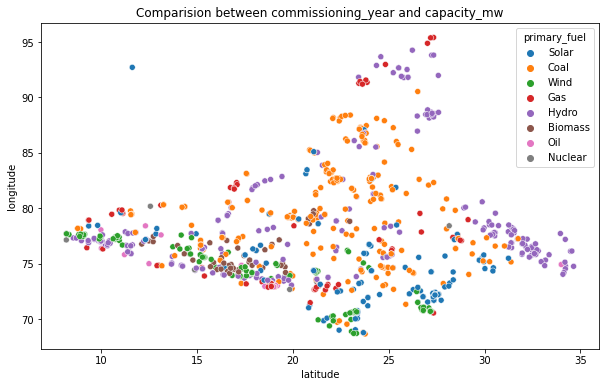

In [44]:
plt.figure(figsize=[10,6])
plt.title('Comparision between commissioning_year and capacity_mw')
sns.scatterplot(df['latitude'],df["longitude"], hue=df['primary_fuel']);

- gives an idea where the power plants are located and ideal location for power plants to be build

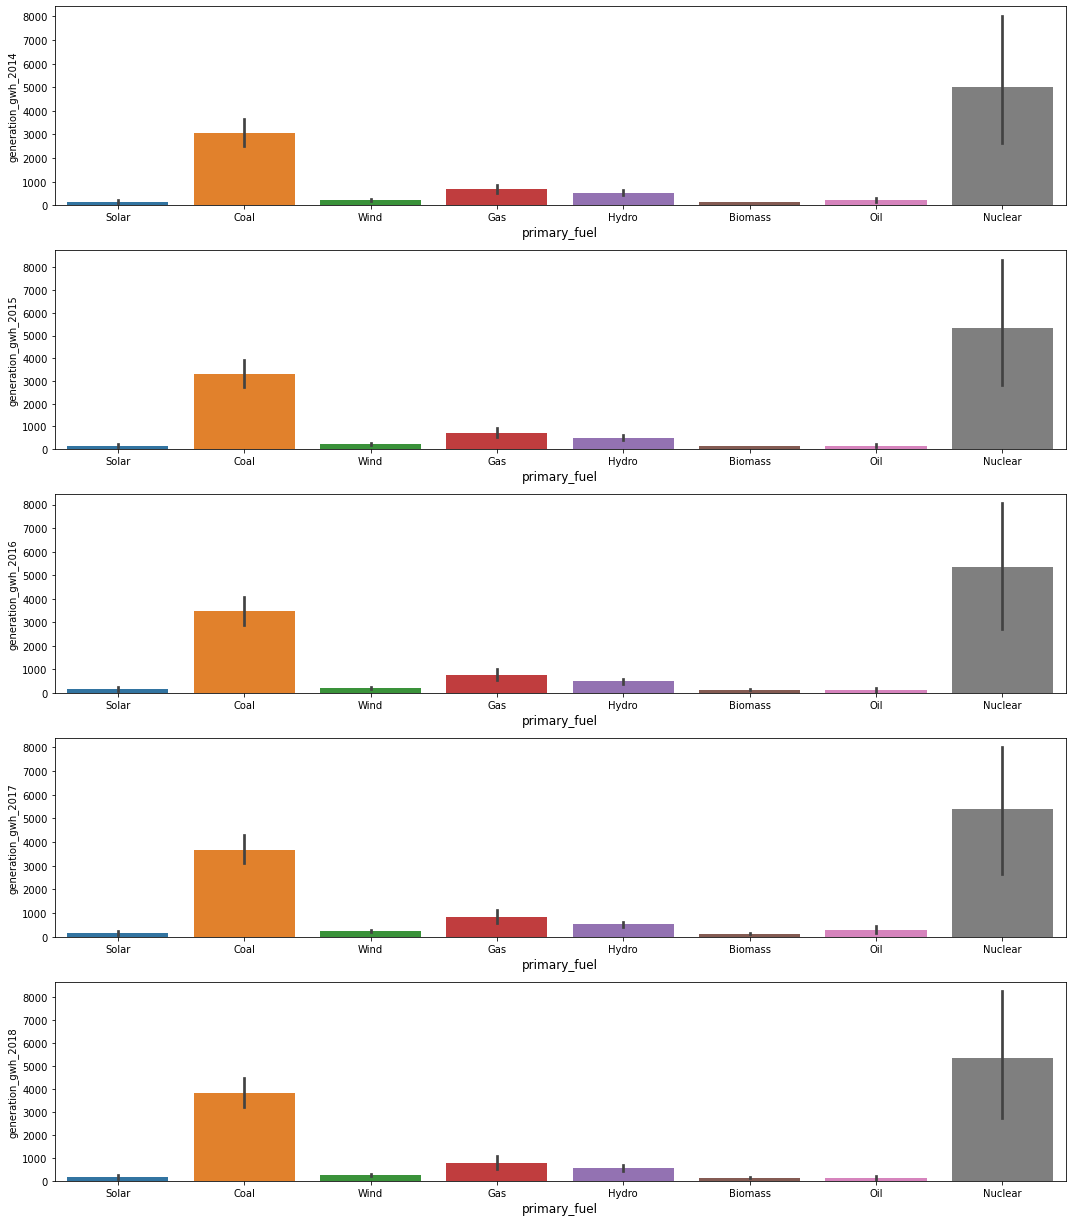

In [45]:
j=0
plt.figure(figsize=(15,20))
for column in df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',"generation_gwh_2017","generation_gwh_2018"]]:
    plt.subplot(6,1,j+1)
    ax=sns.barplot(data=df,y=column, x="primary_fuel")
    plt.xlabel('primary_fuel',fontsize=12)
    j+=1
plt.tight_layout()

- the trend is same for all the years 
- Nuclear power plant has the highest power generation even though they account for the least no. of power plant to be installed
- Coal power plant is the second highest power generation

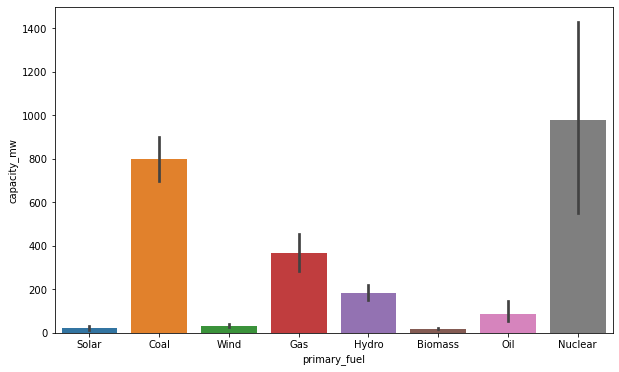

In [46]:
plt.figure(figsize = (10,6))
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

- Nuclear power plant has the highest capacity followed by coal

#### encoding categorical column

In [47]:
p_f={'Solar':0, 'Coal':1, 'Wind':2, 'Gas':3, 'Hydro':4, 'Biomass':5, 'Oil':6, 'Nuclear':7}
df['primary_fuel'] = df['primary_fuel'].map(p_f)
df['primary_fuel'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

#### check skewness

In [48]:
continuecol=['latitude', 'longitude',  'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

In [49]:
df.skew()[continuecol].sort_values()

latitude              -0.136277
longitude              1.135365
generation_gwh_2018    4.812275
generation_gwh_2016    4.937614
generation_gwh_2017    4.939805
generation_gwh_2014    4.944424
generation_gwh_2015    5.211376
dtype: float64

skewness is not within limits

#### using power transform to transform the dataset

In [50]:
#using power transform to transform and normalize the dataset and storing it in A and copying it to df
from sklearn.preprocessing import power_transform
B=df[continuecol].copy()
A=power_transform(B)
A=pd.DataFrame(A,columns=B.columns)
df[B.columns]=A.copy()
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,1.157279,-0.935061,0,2011.000000,-0.949040,-1.043435,-1.111020,-1.201471,-1.196746
1,98.0,0.582782,-0.528447,1,2006.021164,0.562891,0.528595,0.500524,0.465661,0.455999
2,39.2,0.107239,-2.365284,2,2012.000000,0.137878,0.092130,0.057339,0.012849,0.006357
3,135.0,0.433499,2.154880,3,2004.000000,0.512121,0.630711,0.628505,0.448402,0.409637
4,1800.0,0.116571,1.119213,1,2015.000000,-1.885575,1.675390,1.682375,1.570823,1.727175
...,...,...,...,...,...,...,...,...,...,...
901,1600.0,-0.807181,0.166291,1,2016.000000,-1.885575,-2.048938,-0.018314,0.583603,0.455791
902,3.0,-1.348304,0.344092,0,2013.375000,-0.886190,-0.976929,-1.041926,-1.128755,-1.124820
903,25.5,-0.970484,-0.265395,2,2012.000000,-0.050606,-0.102709,-0.141497,-0.191629,-0.196516
904,80.0,0.513289,-0.779153,1,2006.021164,0.465961,0.429392,0.400057,0.363359,0.354367


In [51]:
df.skew()[continuecol].sort_values()

latitude              -0.076281
generation_gwh_2014   -0.014101
generation_gwh_2015   -0.003898
generation_gwh_2016   -0.000587
generation_gwh_2017    0.001088
generation_gwh_2018    0.002148
longitude              0.011269
dtype: float64

skewness is within limits 0.65 to -0.65

#### Outliers check

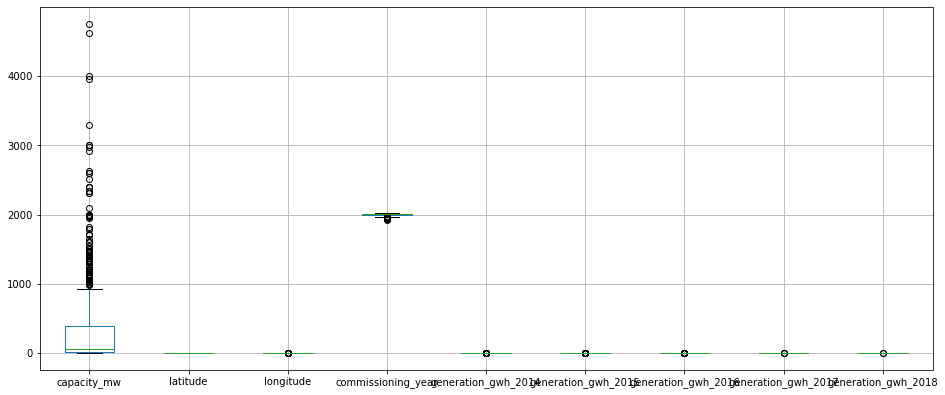

In [55]:
# visualizing
df[numericalCol].iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

- presence of outliers

#### using z score for treating

In [56]:
from scipy.stats import zscore
z=np.abs(zscore(df[numericalCol]))
df_x=df[(z<3).all(axis=1)]
data_loss=((df.shape[0]-df_x.shape[0])/df.shape[0])*100
print("data loss ", data_loss, " %")

data loss  4.304635761589404  %


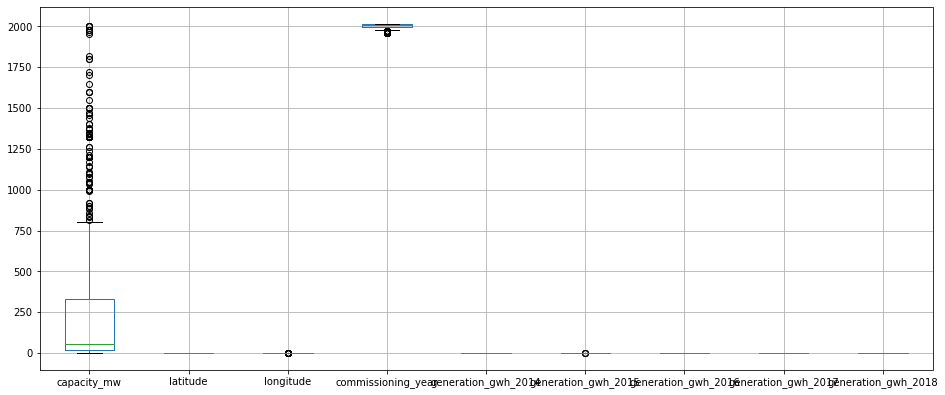

In [57]:
df_x[numericalCol].iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

- outliers have been treated to a large extend 
- not using other measure to treat outliers, as outliers are present in target variable

# As a regression problem target is capacity_mw

In [58]:
#copying df_x to df1
df1=df_x
df1

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,1.157279,-0.935061,0,2011.000000,-0.949040,-1.043435,-1.111020,-1.201471,-1.196746
1,98.0,0.582782,-0.528447,1,2006.021164,0.562891,0.528595,0.500524,0.465661,0.455999
2,39.2,0.107239,-2.365284,2,2012.000000,0.137878,0.092130,0.057339,0.012849,0.006357
3,135.0,0.433499,2.154880,3,2004.000000,0.512121,0.630711,0.628505,0.448402,0.409637
4,1800.0,0.116571,1.119213,1,2015.000000,-1.885575,1.675390,1.682375,1.570823,1.727175
...,...,...,...,...,...,...,...,...,...,...
901,1600.0,-0.807181,0.166291,1,2016.000000,-1.885575,-2.048938,-0.018314,0.583603,0.455791
902,3.0,-1.348304,0.344092,0,2013.375000,-0.886190,-0.976929,-1.041926,-1.128755,-1.124820
903,25.5,-0.970484,-0.265395,2,2012.000000,-0.050606,-0.102709,-0.141497,-0.191629,-0.196516
904,80.0,0.513289,-0.779153,1,2006.021164,0.465961,0.429392,0.400057,0.363359,0.354367


#### checking correlation

In [59]:
numer=['capacity_mw','latitude', 'longitude',  'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

In [60]:
df1[numer].corr()['capacity_mw'].sort_values()

latitude               0.045716
longitude              0.245901
generation_gwh_2014    0.344925
generation_gwh_2015    0.522813
generation_gwh_2016    0.615157
generation_gwh_2017    0.641001
generation_gwh_2018    0.643428
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

- latitude and longitude has the least correlation with the target variable

#### plotting heatmap to see the correlation with other feature

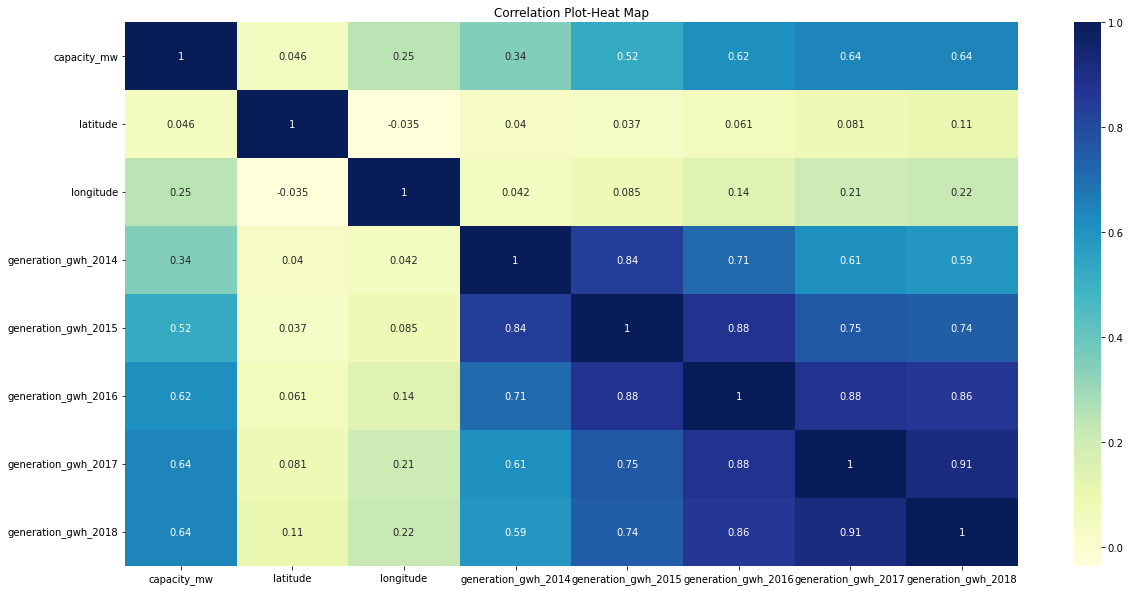

In [61]:
plt.figure(figsize=(20,10))
sns.heatmap(df1[numer].corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot-Heat Map")
plt.show()

- generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 has hgh correlation this is expected as the values imputed is the same 

- need to remove multicolinearity

#### using vif to check for multicolinearity

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=df1[numer].copy()
t=k.drop(['capacity_mw'],axis=1).copy()
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
4,9.211605,generation_gwh_2016
3,7.817567,generation_gwh_2015
5,7.674750,generation_gwh_2017
6,6.822085,generation_gwh_2018
2,3.501804,generation_gwh_2014
1,1.078486,longitude
0,1.021897,latitude


vif is less than 10, within limits

#### Splitting dataset

In [63]:
X=df_x.drop(['capacity_mw'],axis=1)
Y=df_x['capacity_mw']

#### Trying differnent algorithm

In [64]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
A=[] 
B=[] 
C=[] 
D=[] 
mae=[] 

In [65]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
A=[] 
B=[] 
C=[] 
D=[] 
mae=[] 
#loop used to find the best random state
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=(r2_score(y_test,y_pred))*100
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [66]:
# used to get test accuracy, train accuracy, mse, mae
def te_t(regr,x_train,x_test,y_train,y_test,R):
    regr.fit(x_train,y_train)
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    print(f"test accuracy is {round(r2_score(y_test,y_te)*100,1)}")
    A.append(round(r2_score(y_test,y_te)*100,1))
    print(f"train accuracy is {round(r2_score(y_train,y_tr)*100,1)}")
    C.append(mean_squared_error(y_test,y_te))
    mae.append(mean_absolute_error(y_test,y_te))

In [67]:
# used to find the best cv_score
def score(regr,x_train,x_test,y_train,y_test,R):
    max_cv_mean=0
    min_dif=100
    r=0
    k=0
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    t_ac=round(r2_score(y_train,y_tr)*100,1)
    te_ac=round(r2_score(y_test,y_te)*100,1)
    for j in range(2,20):
        cv_score=cross_val_score(regr,X,Y,cv=j)
        cv_mean=cv_score.mean()*100
        d=np.abs(cv_mean-te_ac)
        print(f"At cv is {j} cv score is {round(cv_mean,2)}  \n test accuracy is {te_ac} \n")
        if cv_mean>max_cv_mean:
            max_cv_mean=cv_mean
            k=j
        if d<min_dif:
            min_dif=d
            r=j
    B.append(max_cv_mean) 
    print("min diff between test accuracy and cv score ",min_dif," at ", r," max cv ",max_cv_mean," at ",k)
    D.append(min_dif)

In [68]:
from sklearn.tree import DecisionTreeRegressor
reg= DecisionTreeRegressor()
R=maxr2_score(reg,X,Y)

r2 score corresponding to  0  is  64.93941830654812
r2 score corresponding to  1  is  68.57186895046605
r2 score corresponding to  2  is  48.909652786177425
r2 score corresponding to  3  is  69.80026300170962
r2 score corresponding to  4  is  83.06366351359492
r2 score corresponding to  5  is  77.35879848991635
r2 score corresponding to  6  is  75.57753578136526
r2 score corresponding to  7  is  80.62869128734596
r2 score corresponding to  8  is  69.62095709734939
r2 score corresponding to  9  is  75.62003574762572
r2 score corresponding to  10  is  81.61885762901915
r2 score corresponding to  11  is  78.46610245056117
r2 score corresponding to  12  is  55.611664785989845
r2 score corresponding to  13  is  73.97176086687244
r2 score corresponding to  14  is  57.201017251501
r2 score corresponding to  15  is  68.15121347091043
r2 score corresponding to  16  is  78.05071656934555
r2 score corresponding to  17  is  57.368063865724615
r2 score corresponding to  18  is  74.94044614014636
r2

In [69]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(reg,x1_train,x1_test,y1_train,y1_test,R)
print('\n')
score(reg,x1_train,x1_test,y1_train,y1_test,R)

test accuracy is 80.9
train accuracy is 100.0


At cv is 2 cv score is 73.32  
 test accuracy is 80.9 

At cv is 3 cv score is 66.85  
 test accuracy is 80.9 

At cv is 4 cv score is 70.39  
 test accuracy is 80.9 

At cv is 5 cv score is 71.29  
 test accuracy is 80.9 

At cv is 6 cv score is 66.71  
 test accuracy is 80.9 

At cv is 7 cv score is 65.36  
 test accuracy is 80.9 

At cv is 8 cv score is 64.36  
 test accuracy is 80.9 

At cv is 9 cv score is 62.85  
 test accuracy is 80.9 

At cv is 10 cv score is 64.91  
 test accuracy is 80.9 

At cv is 11 cv score is 64.69  
 test accuracy is 80.9 

At cv is 12 cv score is 59.93  
 test accuracy is 80.9 

At cv is 13 cv score is 62.54  
 test accuracy is 80.9 

At cv is 14 cv score is 62.63  
 test accuracy is 80.9 

At cv is 15 cv score is 66.82  
 test accuracy is 80.9 

At cv is 16 cv score is 63.7  
 test accuracy is 80.9 

At cv is 17 cv score is 62.96  
 test accuracy is 80.9 

At cv is 18 cv score is 68.72  
 test accuracy is

In [70]:

from sklearn.ensemble import RandomForestRegressor
rf_reg= RandomForestRegressor()
R=maxr2_score(rf_reg,X,Y)

r2 score corresponding to  0  is  76.0594932242014
r2 score corresponding to  1  is  82.36530014906332
r2 score corresponding to  2  is  82.85406379486301
r2 score corresponding to  3  is  82.7561147781607
r2 score corresponding to  4  is  88.35494829965108
r2 score corresponding to  5  is  80.90832390664005
r2 score corresponding to  6  is  90.18517246223868
r2 score corresponding to  7  is  86.65130682219751
r2 score corresponding to  8  is  84.14520638262515
r2 score corresponding to  9  is  83.1617045441731
r2 score corresponding to  10  is  89.39856329731242
r2 score corresponding to  11  is  89.27195360478933
r2 score corresponding to  12  is  81.57570673869157
r2 score corresponding to  13  is  81.24498084978053
r2 score corresponding to  14  is  83.94860416826691
r2 score corresponding to  15  is  76.9063243140458
r2 score corresponding to  16  is  91.55079527486477
r2 score corresponding to  17  is  74.42704315291813
r2 score corresponding to  18  is  86.65540190923194
r2 scor

In [71]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(rf_reg,x2_train,x2_test,y2_train,y2_test,R)
print('\n')
score(rf_reg,x2_train,x2_test,y2_train,y2_test,R)

test accuracy is 91.6
train accuracy is 97.2


At cv is 2 cv score is 81.81  
 test accuracy is 91.6 

At cv is 3 cv score is 83.14  
 test accuracy is 91.6 

At cv is 4 cv score is 83.22  
 test accuracy is 91.6 

At cv is 5 cv score is 82.76  
 test accuracy is 91.6 

At cv is 6 cv score is 83.55  
 test accuracy is 91.6 

At cv is 7 cv score is 83.09  
 test accuracy is 91.6 

At cv is 8 cv score is 83.77  
 test accuracy is 91.6 

At cv is 9 cv score is 83.15  
 test accuracy is 91.6 

At cv is 10 cv score is 82.0  
 test accuracy is 91.6 

At cv is 11 cv score is 82.48  
 test accuracy is 91.6 

At cv is 12 cv score is 82.93  
 test accuracy is 91.6 

At cv is 13 cv score is 82.58  
 test accuracy is 91.6 

At cv is 14 cv score is 82.62  
 test accuracy is 91.6 

At cv is 15 cv score is 83.37  
 test accuracy is 91.6 

At cv is 16 cv score is 82.53  
 test accuracy is 91.6 

At cv is 17 cv score is 81.86  
 test accuracy is 91.6 

At cv is 18 cv score is 82.02  
 test accuracy is 

In [72]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knr = KNeighborsRegressor()
R=maxr2_score(knr,X,Y)

r2 score corresponding to  0  is  55.83862624712115
r2 score corresponding to  1  is  53.60407743022808
r2 score corresponding to  2  is  59.90363819585133
r2 score corresponding to  3  is  75.13663990071822
r2 score corresponding to  4  is  65.32332903349702
r2 score corresponding to  5  is  62.50608510471329
r2 score corresponding to  6  is  68.2340915514532
r2 score corresponding to  7  is  58.03205579842263
r2 score corresponding to  8  is  58.777292471337404
r2 score corresponding to  9  is  69.25992332012063
r2 score corresponding to  10  is  65.9290807218929
r2 score corresponding to  11  is  69.56115303228347
r2 score corresponding to  12  is  46.62311287644892
r2 score corresponding to  13  is  56.18729125046092
r2 score corresponding to  14  is  67.09041399087286
r2 score corresponding to  15  is  57.10669713062456
r2 score corresponding to  16  is  71.743643229575
r2 score corresponding to  17  is  55.47225962517568
r2 score corresponding to  18  is  58.74401114105543
r2 sco

In [73]:
x3_train,x3_test,y3_train,y3_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(knr,x3_train,x3_test,y3_train,y3_test,R)
print('\n')
score(knr,x3_train,x3_test,y3_train,y3_test,R)

test accuracy is 76.0
train accuracy is 74.0


At cv is 2 cv score is 61.48  
 test accuracy is 76.0 

At cv is 3 cv score is 61.76  
 test accuracy is 76.0 

At cv is 4 cv score is 63.51  
 test accuracy is 76.0 

At cv is 5 cv score is 63.96  
 test accuracy is 76.0 

At cv is 6 cv score is 63.13  
 test accuracy is 76.0 

At cv is 7 cv score is 62.52  
 test accuracy is 76.0 

At cv is 8 cv score is 63.32  
 test accuracy is 76.0 

At cv is 9 cv score is 62.68  
 test accuracy is 76.0 

At cv is 10 cv score is 62.32  
 test accuracy is 76.0 

At cv is 11 cv score is 62.41  
 test accuracy is 76.0 

At cv is 12 cv score is 63.27  
 test accuracy is 76.0 

At cv is 13 cv score is 61.85  
 test accuracy is 76.0 

At cv is 14 cv score is 63.73  
 test accuracy is 76.0 

At cv is 15 cv score is 63.95  
 test accuracy is 76.0 

At cv is 16 cv score is 61.72  
 test accuracy is 76.0 

At cv is 17 cv score is 62.73  
 test accuracy is 76.0 

At cv is 18 cv score is 61.25  
 test accuracy is

In [74]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
R=maxr2_score(lnr,X,Y)

r2 score corresponding to  0  is  45.50741295000091
r2 score corresponding to  1  is  35.43145241779628
r2 score corresponding to  2  is  34.64765515456424
r2 score corresponding to  3  is  43.288499821209456
r2 score corresponding to  4  is  51.6723367182191
r2 score corresponding to  5  is  49.32748275905611
r2 score corresponding to  6  is  48.52520290691537
r2 score corresponding to  7  is  49.597698260313784
r2 score corresponding to  8  is  41.27080060724704
r2 score corresponding to  9  is  53.52792843788021
r2 score corresponding to  10  is  50.357753615712866
r2 score corresponding to  11  is  44.64069016134161
r2 score corresponding to  12  is  26.49912245712095
r2 score corresponding to  13  is  50.14740712375221
r2 score corresponding to  14  is  52.18715119178194
r2 score corresponding to  15  is  37.526610114509495
r2 score corresponding to  16  is  48.12848418049715
r2 score corresponding to  17  is  3.4580867916954694
r2 score corresponding to  18  is  44.85025326485162

In [75]:
x4_train,x4_test,y4_train,y4_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(lnr,x4_train,x4_test,y4_train,y4_test,R)
print('\n')
score(lnr,x4_train,x4_test,y4_train,y4_test,R)

test accuracy is 56.9
train accuracy is 44.5


At cv is 2 cv score is 40.39  
 test accuracy is 56.9 

At cv is 3 cv score is 41.7  
 test accuracy is 56.9 

At cv is 4 cv score is 43.52  
 test accuracy is 56.9 

At cv is 5 cv score is 40.93  
 test accuracy is 56.9 

At cv is 6 cv score is 41.5  
 test accuracy is 56.9 

At cv is 7 cv score is 41.44  
 test accuracy is 56.9 

At cv is 8 cv score is 42.35  
 test accuracy is 56.9 

At cv is 9 cv score is 39.95  
 test accuracy is 56.9 

At cv is 10 cv score is 35.62  
 test accuracy is 56.9 

At cv is 11 cv score is 40.68  
 test accuracy is 56.9 

At cv is 12 cv score is 42.42  
 test accuracy is 56.9 

At cv is 13 cv score is 36.68  
 test accuracy is 56.9 

At cv is 14 cv score is 38.87  
 test accuracy is 56.9 

At cv is 15 cv score is 37.91  
 test accuracy is 56.9 

At cv is 16 cv score is 36.34  
 test accuracy is 56.9 

At cv is 17 cv score is 35.13  
 test accuracy is 56.9 

At cv is 18 cv score is 35.32  
 test accuracy is 5

In [76]:
from sklearn.ensemble import AdaBoostRegressor
adboost_reg= AdaBoostRegressor()
R=maxr2_score(adboost_reg,X,Y)

r2 score corresponding to  0  is  54.617323334021606
r2 score corresponding to  1  is  54.46897211379458
r2 score corresponding to  2  is  54.74378622034286
r2 score corresponding to  3  is  67.99260287627784
r2 score corresponding to  4  is  70.92584732144641
r2 score corresponding to  5  is  64.3240943773079
r2 score corresponding to  6  is  71.5402030407026
r2 score corresponding to  7  is  73.99638231525651
r2 score corresponding to  8  is  69.1146285714998
r2 score corresponding to  9  is  72.50383692188625
r2 score corresponding to  10  is  67.62221669419056
r2 score corresponding to  11  is  68.20393016152283
r2 score corresponding to  12  is  53.24451905129517
r2 score corresponding to  13  is  70.05730744361192
r2 score corresponding to  14  is  58.62555916496734
r2 score corresponding to  15  is  64.62658920113144
r2 score corresponding to  16  is  72.82017680554364
r2 score corresponding to  17  is  51.68893875865035
r2 score corresponding to  18  is  65.46101133791227
r2 sc

In [77]:
x5_train,x5_test,y5_train,y5_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(adboost_reg,x5_train,x5_test,y5_train,y5_test,R)
print('\n')
score(adboost_reg,x5_train,x5_test,y5_train,y5_test,R)

test accuracy is 72.9
train accuracy is 72.9


At cv is 2 cv score is 67.72  
 test accuracy is 72.9 

At cv is 3 cv score is 63.41  
 test accuracy is 72.9 

At cv is 4 cv score is 63.14  
 test accuracy is 72.9 

At cv is 5 cv score is 62.51  
 test accuracy is 72.9 

At cv is 6 cv score is 62.31  
 test accuracy is 72.9 

At cv is 7 cv score is 62.4  
 test accuracy is 72.9 

At cv is 8 cv score is 60.64  
 test accuracy is 72.9 

At cv is 9 cv score is 61.95  
 test accuracy is 72.9 

At cv is 10 cv score is 57.06  
 test accuracy is 72.9 

At cv is 11 cv score is 60.7  
 test accuracy is 72.9 

At cv is 12 cv score is 61.29  
 test accuracy is 72.9 

At cv is 13 cv score is 59.14  
 test accuracy is 72.9 

At cv is 14 cv score is 59.18  
 test accuracy is 72.9 

At cv is 15 cv score is 59.81  
 test accuracy is 72.9 

At cv is 16 cv score is 57.17  
 test accuracy is 72.9 

At cv is 17 cv score is 54.43  
 test accuracy is 72.9 

At cv is 18 cv score is 55.26  
 test accuracy is 7

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
grad_reg=GradientBoostingRegressor()
R=maxr2_score(grad_reg,X,Y)

r2 score corresponding to  0  is  78.36289523759842
r2 score corresponding to  1  is  81.87018427940055
r2 score corresponding to  2  is  83.04155290073831
r2 score corresponding to  3  is  79.90238316028967
r2 score corresponding to  4  is  87.99002750808033
r2 score corresponding to  5  is  79.82538541752892
r2 score corresponding to  6  is  87.99178033121642
r2 score corresponding to  7  is  86.28011942171224
r2 score corresponding to  8  is  83.6044387422569
r2 score corresponding to  9  is  82.62436203106422
r2 score corresponding to  10  is  88.85363118216227
r2 score corresponding to  11  is  90.9000560628375
r2 score corresponding to  12  is  83.12448427879873
r2 score corresponding to  13  is  81.29582292720285
r2 score corresponding to  14  is  82.2964467831694
r2 score corresponding to  15  is  73.93063667934472
r2 score corresponding to  16  is  91.86391016422111
r2 score corresponding to  17  is  75.77384150853726
r2 score corresponding to  18  is  87.91595555443841
r2 sco

In [79]:
x6_train,x6_test,y6_train,y6_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(grad_reg,x6_train,x6_test,y6_train,y6_test,R)
print('\n')
score(grad_reg,x6_train,x6_test,y6_train,y6_test,R)

test accuracy is 91.7
train accuracy is 96.3


At cv is 2 cv score is 80.34  
 test accuracy is 91.7 

At cv is 3 cv score is 80.79  
 test accuracy is 91.7 

At cv is 4 cv score is 82.13  
 test accuracy is 91.7 

At cv is 5 cv score is 82.18  
 test accuracy is 91.7 

At cv is 6 cv score is 81.74  
 test accuracy is 91.7 

At cv is 7 cv score is 81.75  
 test accuracy is 91.7 

At cv is 8 cv score is 82.75  
 test accuracy is 91.7 

At cv is 9 cv score is 81.5  
 test accuracy is 91.7 

At cv is 10 cv score is 81.03  
 test accuracy is 91.7 

At cv is 11 cv score is 81.47  
 test accuracy is 91.7 

At cv is 12 cv score is 81.58  
 test accuracy is 91.7 

At cv is 13 cv score is 81.38  
 test accuracy is 91.7 

At cv is 14 cv score is 82.04  
 test accuracy is 91.7 

At cv is 15 cv score is 82.0  
 test accuracy is 91.7 

At cv is 16 cv score is 80.67  
 test accuracy is 91.7 

At cv is 17 cv score is 80.81  
 test accuracy is 91.7 

At cv is 18 cv score is 79.44  
 test accuracy is 9

#### Creating Table to view data

In [80]:
L=['DT','RF','KNN','LR','ADA','GRAD']

In [81]:
E=pd.DataFrame({'test accuracy':A,'cv_score': B,'diff':D,'mse':C,'mae':mae},index=L)
E.sort_values(by=['diff','test accuracy', 'mse', 'mae' ])

,test accuracy,cv_score,diff,mse,mae
ADA,72.9,67.716074,5.183926,62705.579905,213.522287
DT,80.9,73.316960,7.583040,31377.184270,75.857149
RF,91.6,83.768818,7.831182,15502.740713,62.005804
GRAD,91.7,82.750296,8.949704,15433.290355,69.232813
KNN,76.0,63.963485,12.036515,39346.769486,106.208039
LR,56.9,43.524272,13.375728,76524.821289,199.776474


#### inference
- random forest is the best model
    - second highest test accuracy score
    - highest cv_score
    - 3rd highest differnce between cv_score and test accuracy
    - least error compared to other models


#### Hyper paramter tuning

In [83]:
from sklearn.model_selection import GridSearchCV

In [99]:
par={'n_estimators': [300,350,400,450], 
     'max_features': ['log2', 'sqrt','auto'],
     'criterion': ["squared_error", "friedman_mse", "absolute_error","poisson"],
     'max_depth': [350,375,400,425],
     'min_samples_split':[2, 3, 4]
}

In [100]:
grid=GridSearchCV( rf_reg,par,cv=2)
grid.fit(x2_train,y2_train)
grid.best_params_ 

{'criterion': 'squared_error',
 'max_depth': 350,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 300}

In [108]:
rf_reg=RandomForestRegressor( criterion= 'squared_error', max_depth= 350, max_features= 'sqrt',min_samples_split=4,n_estimators= 300)
rf_reg.fit(x2_train,y2_train)
y_te=rf_reg.predict(x2_test)
r2=round(r2_score(y2_test,y_te)*100,2)
r2

92.22

In [109]:
cv_score=cross_val_score(rf_reg,X,Y,cv=8)
cv_mean=round(cv_score.mean()*100,2)
print(cv_mean)

84.39


test accuracy and cv_score without any change in difference between the test accuracy and cv_score

#### Storing model and loading it

In [110]:
import pickle
filename='global_power_plant_reg.pkl'
pickle.dump(rf_reg,open(filename,'wb'))

In [111]:
l_m=pickle.load(open('global_power_plant_reg.pkl','rb'))
re=l_m.score(x2_test,y2_test)
print(re*100)

92.21603998739843


# as classification problem target is Primary Fuel

#### checking correlation

In [112]:
df_x.corr()["primary_fuel"].sort_values()

commissioning_year    -0.438358
latitude              -0.143913
capacity_mw           -0.104138
generation_gwh_2016   -0.080943
generation_gwh_2018   -0.060084
generation_gwh_2017   -0.050399
generation_gwh_2015   -0.036193
generation_gwh_2014    0.016347
longitude              0.103212
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

generation_gwh_2017, generation_gwh_2015, generation_gwh_2014 and longitude has the least correlation with the target variable

#### plotting heatmap to see the correlation with other feature

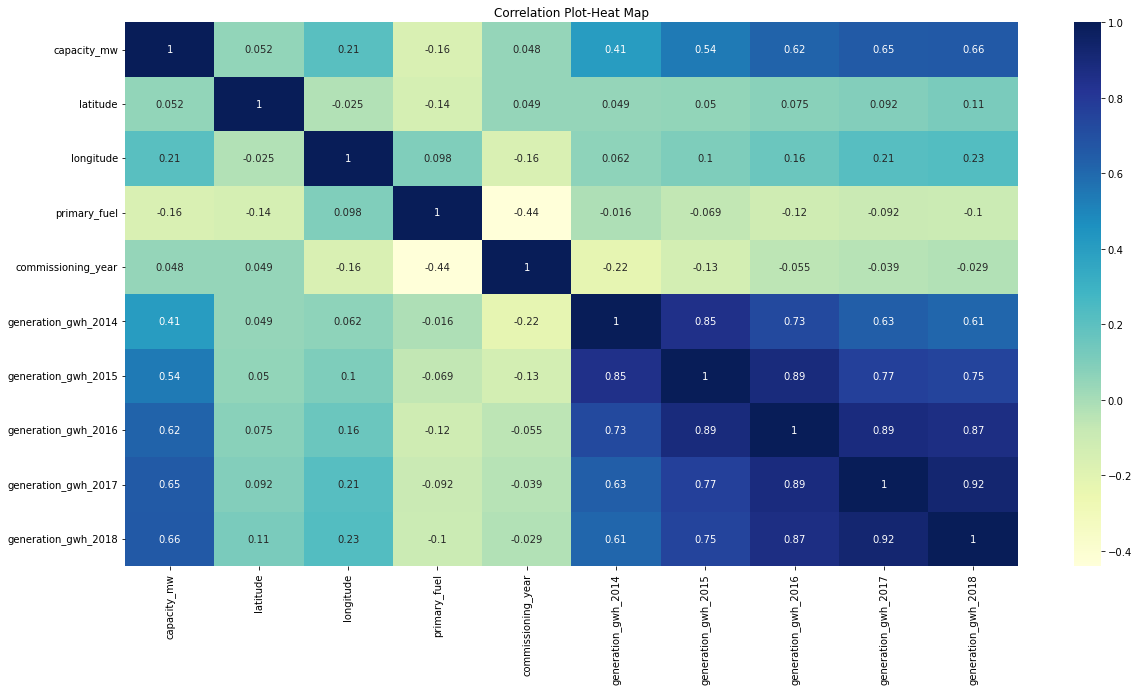

In [113]:
 plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot-Heat Map")
plt.show()

#### using vif to check for multicolinearity

In [114]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
t=df.drop(['primary_fuel'],axis=1).copy()
d=sc.fit_transform(df)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
7,9.816182,generation_gwh_2017
8,8.596263,generation_gwh_2018
6,8.382506,generation_gwh_2016
5,3.920342,generation_gwh_2015
0,1.898963,capacity_mw
4,1.376403,generation_gwh_2014
3,1.310259,commissioning_year
2,1.130495,longitude
1,1.039463,latitude


vif is within the limits less than 10

#### Splitting dataset

In [115]:
X=df.drop('primary_fuel',axis=1)
Y=df['primary_fuel']

#### checking if target data is imbalanced

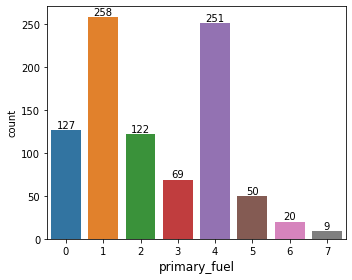

In [116]:
# plotting countplot graph 
plt.figure(figsize=(5,4))
ax =sns.countplot(df['primary_fuel'])
ax.bar_label(ax.containers[0]);
plt.xlabel('primary_fuel',fontsize=12)
plt.tight_layout()

imbalanced data

#### Using Smote to balance the data

In [119]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

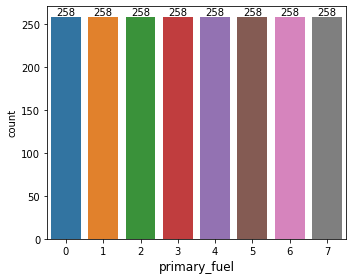

In [120]:
# plotting countplot graph 
plt.figure(figsize=(5,4))
ax =sns.countplot(Y)
ax.bar_label(ax.containers[0]);
plt.xlabel('primary_fuel',fontsize=12)
plt.tight_layout()

target data is balanced

#### Running Algorithm

In [121]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error


from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
A=[]
B=[]
C=[]
D=[]
E=[]
mae=[]

In [122]:
#loop used to find the best random state
def max_aucroc_score(regr,X,Y):
    max_aucroc_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = r_state, test_size=0.20,stratify=Y)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        aucroc_scr=(accuracy_score(y_test,y_pred))*100
        print("accuracy score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [123]:
# used to get test accuracy, train accuracy, mse, mae,F1score,confusion matrix,classification report and auc score
def te_t(regr,x_train,x_test,y_train,y_test):
    regr.fit(x_train,y_train)
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    print(f"test accuracy is {round(accuracy_score(y_test,y_te)*100,1)}")
    A.append(round(accuracy_score(y_test,y_te)*100,1))
    print(f"train accuracy is {round(accuracy_score(y_train,y_tr)*100,1)}")
    C.append(mean_squared_error(y_test,y_te))
    mae.append(mean_absolute_error(y_test,y_te))
    print("Confusion matrix \n",confusion_matrix(y_test,y_te))
    print('\n')
    print("classification report \n",classification_report(y_test,y_te))

In [124]:
# used to find the best cv_score
def score(regr,x_train,x_test,y_train,y_test):
    max_cv_mean=0
    min_dif=100
    r=0
    k=0
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    t_ac=round(accuracy_score(y_train,y_tr)*100,1)
    te_ac=round(accuracy_score(y_test,y_te)*100,1)
    for j in range(2,20):
        cv_score=cross_val_score(regr,X,Y,cv=j)
        cv_mean=cv_score.mean()*100
        d=np.abs(cv_mean-te_ac)
        print(f"At cv is {j} cv score is {round(cv_mean,2)}  \n test accuracy is {te_ac} \n")
        if cv_mean>max_cv_mean:
            max_cv_mean=cv_mean
            k=j
        if d<min_dif:
            min_dif=d
            r=j
    B.append(max_cv_mean) 
    print("min diff between test accuracy and cv score ",min_dif," at ", r," max cv ",max_cv_mean," at ",k)
    D.append(min_dif)

In [125]:
from sklearn.tree import DecisionTreeClassifier
reg=DecisionTreeClassifier()
R=max_aucroc_score(reg,X,Y)

accuracy score corresponding to  0  is  86.68280871670703
accuracy score corresponding to  1  is  90.55690072639226
accuracy score corresponding to  2  is  87.89346246973365
accuracy score corresponding to  3  is  86.4406779661017
accuracy score corresponding to  4  is  86.68280871670703
accuracy score corresponding to  5  is  87.89346246973365
accuracy score corresponding to  6  is  86.68280871670703
accuracy score corresponding to  7  is  88.13559322033898
accuracy score corresponding to  8  is  89.34624697336562
accuracy score corresponding to  9  is  85.95641646489103
accuracy score corresponding to  10  is  86.4406779661017
accuracy score corresponding to  11  is  85.95641646489103
accuracy score corresponding to  12  is  89.10411622276028
accuracy score corresponding to  13  is  88.86198547215496
accuracy score corresponding to  14  is  90.79903147699758
accuracy score corresponding to  15  is  88.37772397094432
accuracy score corresponding to  16  is  85.71428571428571
accuracy 

In [126]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(reg,x1_train,x1_test,y1_train,y1_test)
print('\n')
score(reg,x1_train,x1_test,y1_train,y1_test)

test accuracy is 87.9
train accuracy is 100.0
Confusion matrix 
 [[54  0  0  1  1  0  0  0]
 [ 1 35  0  5  8  0  1  0]
 [ 0  0 51  0  0  6  0  0]
 [ 0  2  0 35  5  0  1  1]
 [ 0  0  0  6 35  0  4  1]
 [ 0  0  3  0  0 53  0  0]
 [ 0  0  0  0  0  0 46  2]
 [ 0  0  1  0  1  0  0 54]]


classification report 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.95      0.70      0.80        50
           2       0.93      0.89      0.91        57
           3       0.74      0.80      0.77        44
           4       0.70      0.76      0.73        46
           5       0.90      0.95      0.92        56
           6       0.88      0.96      0.92        48
           7       0.93      0.96      0.95        56

    accuracy                           0.88       413
   macro avg       0.88      0.87      0.87       413
weighted avg       0.88      0.88      0.88       413



At cv is 2 cv score is 84.35  
 test ac

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()
R=max_aucroc_score(rf_c,X,Y)

accuracy score corresponding to  0  is  92.49394673123487
accuracy score corresponding to  1  is  93.7046004842615
accuracy score corresponding to  2  is  92.00968523002422
accuracy score corresponding to  3  is  92.00968523002422
accuracy score corresponding to  4  is  92.00968523002422
accuracy score corresponding to  5  is  93.46246973365618
accuracy score corresponding to  6  is  91.52542372881356
accuracy score corresponding to  7  is  92.25181598062953
accuracy score corresponding to  8  is  93.7046004842615
accuracy score corresponding to  9  is  92.00968523002422
accuracy score corresponding to  10  is  91.28329297820824
accuracy score corresponding to  11  is  90.79903147699758
accuracy score corresponding to  12  is  92.7360774818402
accuracy score corresponding to  13  is  93.7046004842615
accuracy score corresponding to  14  is  93.46246973365618
accuracy score corresponding to  15  is  92.49394673123487
accuracy score corresponding to  16  is  91.52542372881356
accuracy sc

In [128]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(rf_c,x2_train,x2_test,y2_train,y2_test)
print('\n')
score(rf_c,x2_train,x2_test,y2_train,y2_test)

test accuracy is 90.8
train accuracy is 100.0
Confusion matrix 
 [[53  1  0  0  0  0  0  0]
 [ 1 47  0  4  3  0  0  1]
 [ 0  0 41  0  0  5  0  0]
 [ 0  2  0 48  1  0  0  0]
 [ 1  9  1  3 49  0  1  0]
 [ 0  0  3  0  0 45  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  2  0  0  0 46]]


classification report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.80      0.84      0.82        56
           2       0.91      0.89      0.90        46
           3       0.84      0.94      0.89        51
           4       0.92      0.77      0.84        64
           5       0.90      0.94      0.92        48
           6       0.98      1.00      0.99        46
           7       0.98      0.96      0.97        48

    accuracy                           0.91       413
   macro avg       0.91      0.91      0.91       413
weighted avg       0.91      0.91      0.91       413



At cv is 2 cv score is 89.83  
 test ac

In [129]:
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
R=max_aucroc_score(kc,X,Y)

accuracy score corresponding to  0  is  78.20823244552058
accuracy score corresponding to  1  is  72.63922518159806
accuracy score corresponding to  2  is  77.4818401937046
accuracy score corresponding to  3  is  74.33414043583535
accuracy score corresponding to  4  is  72.88135593220339
accuracy score corresponding to  5  is  74.818401937046
accuracy score corresponding to  6  is  76.02905569007264
accuracy score corresponding to  7  is  72.39709443099274
accuracy score corresponding to  8  is  77.23970944309927
accuracy score corresponding to  9  is  75.30266343825666
accuracy score corresponding to  10  is  74.09200968523002
accuracy score corresponding to  11  is  74.33414043583535
accuracy score corresponding to  12  is  71.1864406779661
accuracy score corresponding to  13  is  78.20823244552058
accuracy score corresponding to  14  is  74.57627118644068
accuracy score corresponding to  15  is  73.8498789346247
accuracy score corresponding to  16  is  73.36561743341404
accuracy sco

In [130]:

x3_train,x3_test,y3_train,y3_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(kc,x3_train,x3_test,y3_train,y3_test)
print('\n')
score(kc,x3_train,x3_test,y3_train,y3_test)

test accuracy is 76.8
train accuracy is 83.2
Confusion matrix 
 [[34  0  2  0  0  3  0  0]
 [ 1 33  1  8  4  0  0  3]
 [ 0  1 37  0  0  5  0  0]
 [ 0  5  1 42  3  0  1  2]
 [ 0  6  4  4 26  0  2  7]
 [ 1  0  1  0  0 48  0  0]
 [ 0  0  0  2  5  0 59  2]
 [ 0 10  0  5  7  0  0 38]]


classification report 
               precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.60      0.66      0.63        50
           2       0.80      0.86      0.83        43
           3       0.69      0.78      0.73        54
           4       0.58      0.53      0.55        49
           5       0.86      0.96      0.91        50
           6       0.95      0.87      0.91        68
           7       0.73      0.63      0.68        60

    accuracy                           0.77       413
   macro avg       0.77      0.77      0.77       413
weighted avg       0.77      0.77      0.77       413



At cv is 2 cv score is 73.45  
 test acc

In [131]:
from sklearn.ensemble import AdaBoostClassifier
adboost_c=AdaBoostClassifier()
R=max_aucroc_score(adboost_c,X,Y)

accuracy score corresponding to  0  is  26.39225181598063
accuracy score corresponding to  1  is  26.634382566585955
accuracy score corresponding to  2  is  23.728813559322035
accuracy score corresponding to  3  is  25.66585956416465
accuracy score corresponding to  4  is  25.423728813559322
accuracy score corresponding to  5  is  25.181598062954
accuracy score corresponding to  6  is  25.181598062954
accuracy score corresponding to  7  is  29.539951573849876
accuracy score corresponding to  8  is  26.39225181598063
accuracy score corresponding to  9  is  24.213075060532688
accuracy score corresponding to  10  is  28.087167070217916
accuracy score corresponding to  11  is  29.782082324455207
accuracy score corresponding to  12  is  26.634382566585955
accuracy score corresponding to  13  is  24.93946731234867
accuracy score corresponding to  14  is  26.39225181598063
accuracy score corresponding to  15  is  25.907990314769975
accuracy score corresponding to  16  is  24.455205811138015
a

In [132]:
x4_train,x4_test,y4_train,y4_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(adboost_c,x4_train,x4_test,y4_train,y4_test)
print('\n')
score(adboost_c,x4_train,x4_test,y4_train,y4_test)

test accuracy is 24.2
train accuracy is 29.7
Confusion matrix 
 [[ 0  0 45  1  0  0  0  0]
 [ 0 23 15  1  0  0  0 14]
 [ 0  0 42  0  0  0  0  0]
 [ 0 27  7  1  0  0  0 15]
 [ 0 10  6  1  0  0  0 43]
 [ 0  0 64  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 56]
 [ 0  7  1  0  0  0  0 34]]


classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.34      0.43      0.38        53
           2       0.23      1.00      0.38        42
           3       0.25      0.02      0.04        50
           4       0.00      0.00      0.00        60
           5       0.00      0.00      0.00        64
           6       0.00      0.00      0.00        56
           7       0.21      0.81      0.33        42

    accuracy                           0.24       413
   macro avg       0.13      0.28      0.14       413
weighted avg       0.12      0.24      0.13       413



At cv is 2 cv score is 28.1  
 test accu

#### Creating Table to store datas

In [138]:
aa=['DT','RF','KNN','ADA']
kk=pd.DataFrame({'test accuracy':A,'max_cv_score': B,'diff':D,'mse':C,'mae':mae},index=aa)
kk.sort_values(by=['diff','test accuracy', 'max_cv_score','mse', 'mae' ])

,test accuracy,max_cv_score,diff,mse,mae
DT,87.9,88.032946,0.011358,0.796610,0.283293
KNN,76.8,77.906977,0.043871,2.648910,0.702179
RF,90.8,92.832949,0.624419,0.731235,0.242131
ADA,24.2,29.312016,1.042248,6.000000,1.893462


#### inference
-  random forest is the best model
    - highest test accuracy and cv_score 
    - difference between cv_score and test accurcay is 3rd highest 
    - least error compared to other model
    
    
- i tried tuning DT but i was not able to reduce the difference between cv_score and test accuracy, the least value as difference i got was 0.7    

#### Hyper paramter tuning

In [202]:
par={'n_estimators': [375,400,425,450], 
     'max_features': ['log2', 'sqrt','auto'],
     'criterion': ['entropy', 'gini'],
     'max_depth': [180,190,200,210],
     'min_samples_split':[2, 3, 4]
}

In [203]:
grid=GridSearchCV( rf_c,par,cv=2)
grid.fit(x2_train,y2_train)
grid.best_params_  

{'criterion': 'gini',
 'max_depth': 190,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 400}

In [216]:
rf=RandomForestClassifier( criterion= 'gini', max_depth = 190, max_features= 'sqrt', min_samples_split= 2, n_estimators= 400)
rf.fit(x2_train,y2_train)
y_te=rf.predict(x2_test)
r2=round(accuracy_score(y2_test,y_te)*100,1)
print(r2)

92.0


In [217]:
cv_score=cross_val_score(rf,X,Y,cv=3)
cv_mean=round(cv_score.mean()*100,2)
print(cv_mean)

92.01


- test accuracy increased with minor decrease in cv_score
- difference between cv_score and test accuracy reduced to 0.01

#### Storing model and loading it

In [219]:
import pickle
filename='global_power_plant_c.pkl'
pickle.dump(rf,open(filename,'wb'))

In [220]:
l_m=pickle.load(open('global_power_plant_c.pkl','rb'))
re=l_m.score(x2_test,y2_test)
print(re*100)

92.00968523002422
